In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle
import scipy
from PIL import Image
import pdb

import datetime
from scipy.io import savemat, loadmat

In [2]:

def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()

    # if hasFrames:
    #     cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames, image

def filepathToIdxKey(filepath):
    filename = filepath.split('/')[-1]
    subject_name = filename.split('_')[1]
    session_name = filename.split('_')[2][-2:]
    trial_name = filename.split('-')[-1].replace('.mp4', '')
    better_filename = subject_name + '_S' + session_name + '_' + trial_name 
    return better_filename

In [3]:
videoframes_idx_raw = list(loadmat("../data/trial_info_vf_idx.mat")['trial_info_dict'])[0]
videoframes_idx = {}

for field in videoframes_idx_raw.dtype.names: #iterates through field names of numpy array
    videoframes_idx[field] = np.squeeze(videoframes_idx_raw[field][0])


In [4]:
new_dirpath = 'ben_videos'

dir_to_files = {}
for (dirpath, dirnames, filenames) in os.walk('../data/ben_videos'):
    list_of_files = []
    
    # make new directories 
    # new_dirpath = dirpath.replace('ben_videos', 'ben_videos_frames')
    os.makedirs(new_dirpath, exist_ok=True)
    for filename in filenames:
        if filename.endswith('.mp4'):
            list_of_files.append( os.sep.join([dirpath, filename]))
    if len(list_of_files) > 0:
        dir_to_files[dirpath] = list_of_files




In [232]:
videoPath = '../data/ben_videos/emanuele_B151/S17/B4/emanuele_B151_20180117_S0-B4-T153.mp4'

In [233]:
frames_idx = videoframes_idx[filepathToIdxKey(videoPath)]


In [234]:
frames_idx

array([1545, 2629, 2826, 1564, 1851, 2842, 2844, 2846, 2848, 2849, 2851,
       2852, 2854, 2856, 2857, 2858, 2860, 2861, 2863, 2864, 2865, 2867,
       2868, 2870, 2871, 2873, 2874, 2876, 2877, 2879, 2880, 2882, 2883,
       2885, 2887, 2888, 2890, 2892, 2894, 2896, 2899, 2902, 2906, 2954,
       2957, 2959, 2962, 2964, 2966, 2968, 2970, 2972, 2973, 2975, 2977,
       2979, 2980, 2982, 2983, 2985, 2986, 2988, 2990, 2991, 2993, 2994,
       2996, 2997, 2999, 3000, 3002, 3003, 3005, 3006, 3008, 3009, 3010,
       3012, 3013, 3015, 3016, 3018, 3020, 3021, 3023, 3025, 3026, 3028,
       3030, 3032, 3034, 3035, 3037, 3039, 3041, 3043, 3045, 3048, 3050,
       3052, 3054, 3056, 3058, 3060, 3062, 3065, 3066, 3068, 3070, 3072,
       3074, 3076, 3077, 3078, 3080, 3081, 3083, 3084, 3086, 3088, 3089,
       3091, 3092, 3093, 3095, 3096, 3098, 3100, 3101, 3103, 3105, 3107,
       3316, 3325, 3370, 3587, 3588, 3590, 3597, 3599, 3600, 3601, 3603,
       3604, 3607, 3609, 3610, 3611, 3612, 3614, 36

'../data/ben_videos_frames/emanuele_B151/S17'

In [240]:
import pdb

for dirpath in dir_to_files:
    list_of_files = dir_to_files[dirpath]

    print('At dirpath:' + dirpath + ' @ ' + datetime.datetime.now().strftime('%m-%d %H:%M'))

    # Create the 'ben_video_frames' directory if it doesn't exist # TODO fix this here
    frames_dir = os.path.join('../data/ben_videos_frames', dirpath.split(os.sep)[3], dirpath.split(os.sep)[4])
    os.makedirs(frames_dir, exist_ok=True)
    frames_per_dir = []
    for video_i, videoPath in enumerate(list_of_files[:50]):
        
        
        if np.mod(video_i, 50) == 0:
            print(f'On File: {videoPath.split('/')[-1]} \n { str(file_i / len(list_of_files))} ')
        cap = cv2.VideoCapture(str(videoPath))
        
        
        # Get total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        images = np.full((68, 120, total_frames), np.nan);
        frames_idx_list = videoframes_idx[filepathToIdxKey(videoPath)]
        
        # keep track of frames seen so far 
        frame_idx_i = 0
        for frame_count in range(total_frames):
        
            ret, frame = cap.read()
        
            # Break the loop if there are no more frames or we have finished getting the frames we want
        
            if frame_count > np.max(frames_idx_list):
                break
            if not ret:
                break
            # Save the frame to a vector once we go past the starting frames
            if frame_count >= np.min(frames_idx_list):
                        
                frame_smaller = np.array(Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)[:,:,-1]).resize(size=(120, 68)))
                images[:,:,frame_count] = frame_smaller

        images_filtered = images[:, :, frames_idx_list];
        

        
        # Release the video capture object
        cap.release()
        
        # Keep track of the frames per directory

        if images_filtered.shape != (68, 120, 221):
            print(f'Something is wrong: Trial {video_i} at {videoPath} is wrong')
            
            
        frames_per_dir.append(images_filtered)

    


    print("finished with directory" + dirpath);
    output_file = os.path.join(frames_dir + '/all_frames.p')

    pickle.dump(frames_per_dir, open(output_file, 'wb'))


At dirpath:../data/ben_videos/emanuele_B151/S17/B4 @ 12-13 17:01
On File: 0.004830917874396135%
finished with directory../data/ben_videos/emanuele_B151/S17/B4
At dirpath:../data/ben_videos/emanuele_B151/S18/B2 @ 12-13 17:13
On File: 0.004739336492890996%
finished with directory../data/ben_videos/emanuele_B151/S18/B2


In [182]:

pickle_file_path = "../data/ben_videos_frames/emanuele_B151/all_frames_S17.p"

# Open the pickle file for reading
with open(pickle_file_path, 'rb') as file:
    # Load the data from the pickle file
    frames_per_dir_S17 = pickle.load(file)

pickle_file_path = "../data/ben_videos_frames/emanuele_B151/all_frames_S18.p"

# Open the pickle file for reading
with open(pickle_file_path, 'rb') as file:
    # Load the data from the pickle file
    frames_per_dir_S18 = pickle.load(file)

In [218]:
frames_all = frames_per_dir_S17 + frames_per_dir_S18
# all 418 trials' frames, averaged. outputs as 68 X 120 X 221 timesteps 
frames_all_avg = np.squeeze(np.mean(np.stack([frames_all], axis = -1),0))
obses_avg_flat = frames_all_avg.T.reshape((221, 68 * 120))


In [ ]:

# Assuming arrays is your list of arrays
array_shapes = [arr.shape for arr in frames_all]

# Check if all shapes are equal
if all(np.array_equal(shape, array_shapes[0]) for shape in array_shapes):
    frames_all_stacked = np.stack(frames_all, axis=-1)
    print("All good")
else:
    print("Array shapes are not consistent.")
    for i, shape in enumerate(array_shapes):
        if not np.array_equal(shape, array_shapes[0]):
            print(f"Trial {i + 1}, at Index {i} has shape {shape}")


187

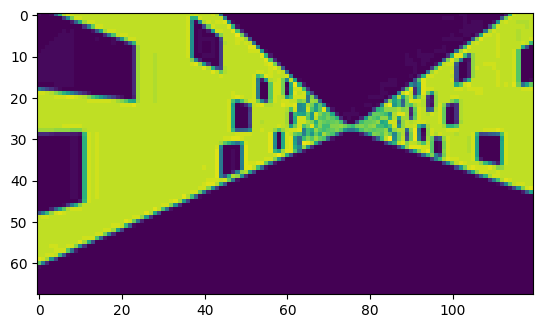

In [135]:
plt.imshow(frames_all[162][:,:,2])

In [114]:
# helper functions (to put in a different file)

def plot_frame(frame_i, vmin=None,vmax=None):
    if vmin is None:
        vmin = np.min(frame_i)
        vmax = np.max(frame_i)
    plt.imshow(obses_trial[:,:,frame_i], cmap = 'viridis', vmin=vmin, vmax=vmax)
    plt.xticks([])
    plt.yticks([])
    
"""
autocorr calculates mean-corrected cos angle across time of a matrix as a measure of similarity
        each timestep's vector is mean-corrected, then normalized to length 1, then dot producted to itself
inputs> mat: matrix with ROWS of observations across time.(so timesteps x shape)
"""
def covar_mat(mat):

    mat_meancorr = np.vstack([mat_i - np.mean(mat_i) for mat_i in mat])
    mat_norm = np.sqrt(np.diag(mat_meancorr.dot(mat_meancorr.T)))
    return (mat_meancorr/mat_norm[:, None]).dot((mat_meancorr/mat_norm[:, None]).T)



In [115]:
# helper functions  for 1D plots 

def align_ac(mat, shift_order): return np.vstack(
    [np.roll(mat[i, :], shift=-shift_i) for (i, shift_i) in enumerate(shift_order)])


def get_align_nowrap(mat, shift_order):
    padded_mat = np.hstack([np.full(mat.shape, np.nan), mat])
    aligned_mat = align_ac(padded_mat, shift_order)

    return aligned_mat


def get_1D_by_lag(mat, shift_order):
    aligned_mat = get_align_nowrap(mat, shift_order)

    return np.nanmean(aligned_mat, 0)[2:-1]


def plot_1D(aligned_1D):
    ypos_clipped = ypos_cuep[autocorr_start+1:autocorr_end-1]
    plt.plot(np.sort(-ypos_clipped), aligned_1D[:101], 'C0')
    plt.plot(ypos_clipped, aligned_1D[102:], 'C0')



In [116]:
frames_all[0][:, :,:].shape

(68, 120, 221)

In [219]:
obses_ac = covar_mat(obses_avg_flat)


Text(0, 0.5, 'Position(cm)')

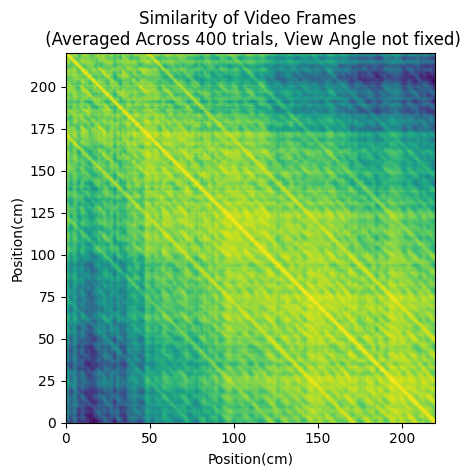

In [225]:
plt.imshow(obses_ac, extent = [0, 220, 0, 220])
plt.title('Similarity of Video Frames \n (Averaged Across 400 trials, View Angle not fixed)')

plt.xlabel('Position(cm)')
plt.ylabel('Position(cm)')

In [156]:


ben_video_frames_dir = {}
for (dirpath, dirnames, filenames) in os.walk('../data/ben_videos_frames'):
    list_of_files = []
    

    for filename in filenames:
        if filename.endswith('.mat'):
            # subject_name = filename.split('_')[0]
            # session_name = filename.split('_')[1]
            # trial_name = filename.split('_')[2]

            # better_filename = subject_name + '_S' + session_name + '_' + trial_name 

            filepath = os.path.join(dirpath, filename)
            # new_filepath = os.path.join(dirpath, better_filename)

            # os.rename(old_filepath, new_filepath)
        

            list_of_files.append(filepath)
    if len(list_of_files) > 0:
        ben_video_frames_dir[dirpath] = list_of_files




In [215]:
# for dirpath_frames in ben_video_frames_dir['../data/ben_videos_frames/emanuele_B947/S10']:
if True:
    dirpath_frames = '../data/ben_videos_frames/emanuele_B14972'
    list_of_frame_filenames = ben_video_frames_dir[dirpath_frames]
    num_trials = len(list_of_frame_filenames)

    frames_per_sess = np.zeros((num_trials, 220, 69, 120))

    for frame_filepath in list_of_frame_filenames[:10]:
    # if True:
        # frame_filepath = '../data/ben_videos_frames/emanuele_B14974/B14972_S10_T1.mat'
        mat_frames = loadmat(frame_filepath)['images']

        frame_filename = frame_filepath.split('/')[-1].replace('.mat', '')
        
        frames_idx = videoframes_idx[frame_filename]
        trial_i = int(frame_filename.split('T')[1])

        # Append the extracted information to the aggregated list
        # frames_per_sess[trial_i, :, :, :] = mat_frames[frames_idx, :, :]
        print(mat_frames.shape)
        print(frames_idx[0])
        print(frames_idx[-1])
    # Save the aggregated information to a new file using pickle
    output_file = os.path.join(dirpath_frames, 'all_frames.p')
    # with open(output_file, 'wb') as f:
    #     pickle.dump(frames_per_subj, f)

(284, 69, 120)
68
515
(313, 69, 120)
59
440
(395, 69, 120)
258
780
(248, 69, 120)
67
419
(314, 69, 120)
65
491
(251, 69, 120)
69
442
(293, 69, 120)
55
451
(374, 69, 120)
217
832
(198, 69, 120)
47
356
(227, 69, 120)
73
427


In [216]:
515 - 68

447

In [221]:
(440 - 59)/(313 * 2)

0.6086261980830671

In [220]:
220/300

0.7333333333333333

In [213]:
frame_filepath

'../data/ben_videos_frames/emanuele_B14974/B14974_S08_T1.mat'

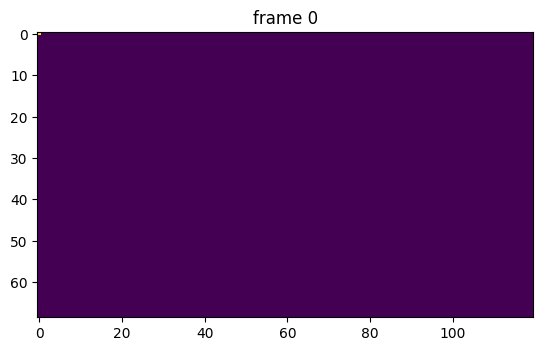

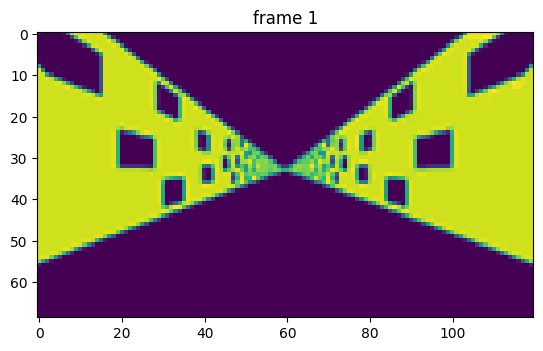

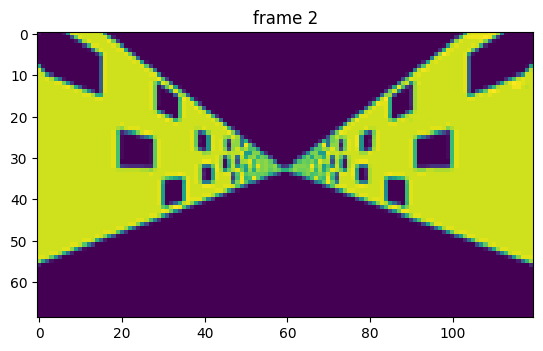

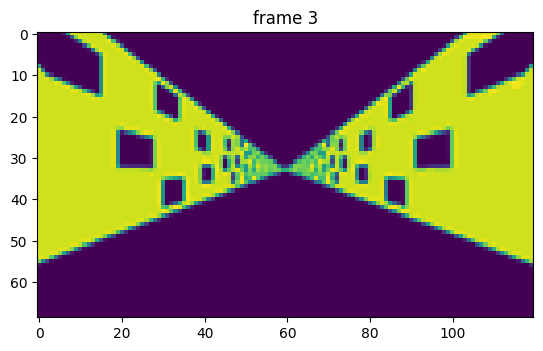

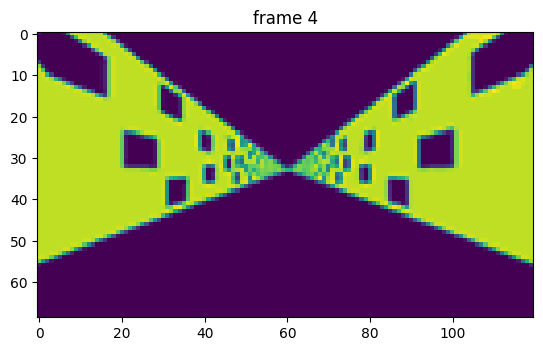

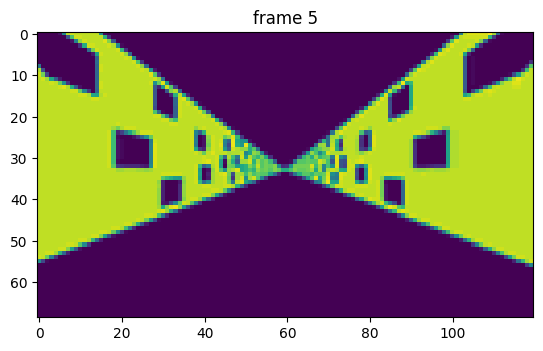

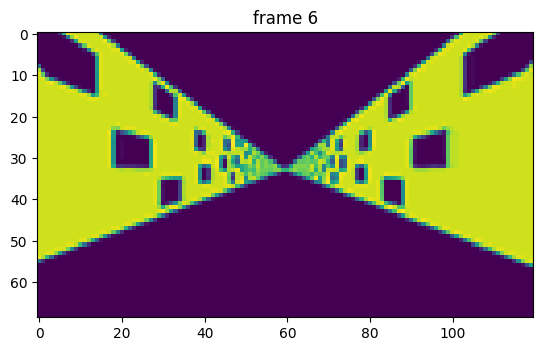

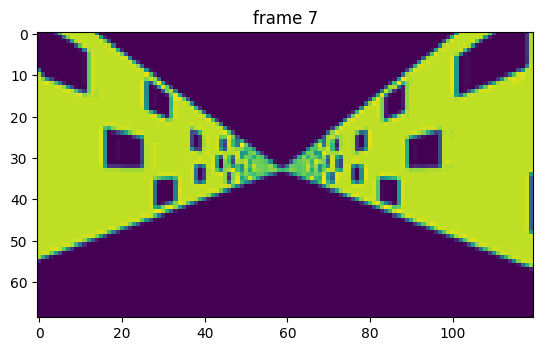

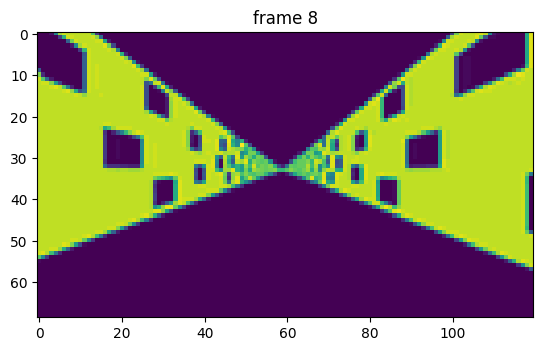

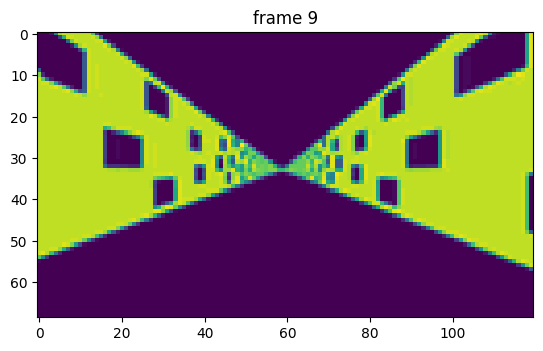

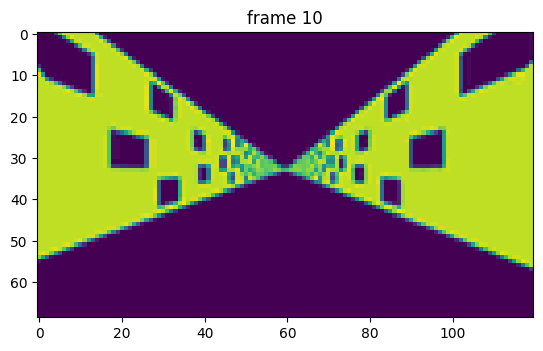

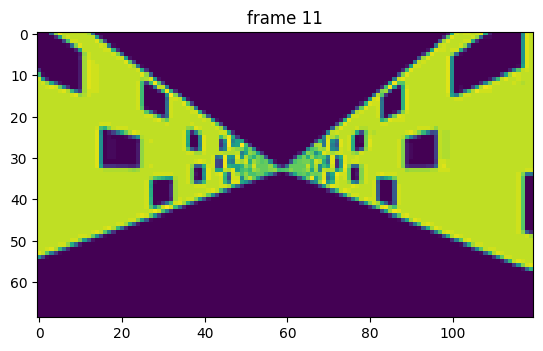

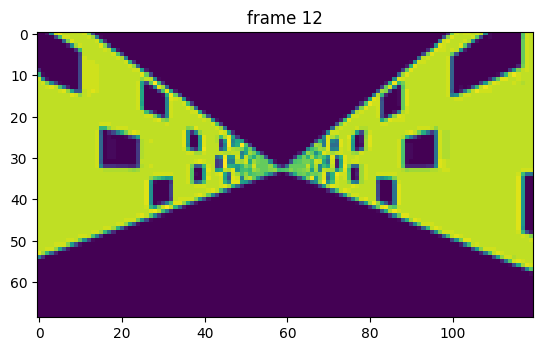

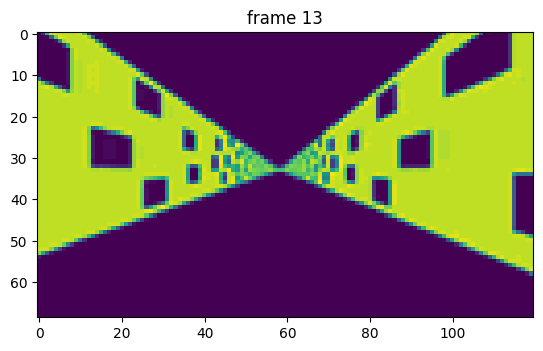

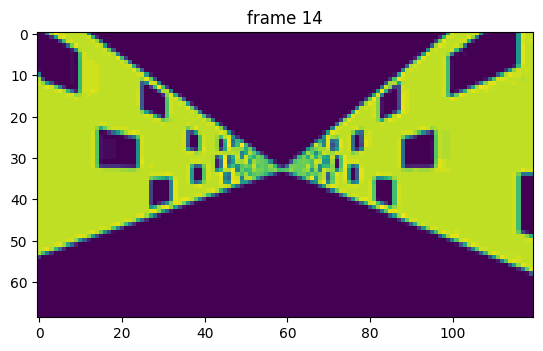

In [214]:
for frame in np.arange(0,15):
    plt.figure
    plt.title('frame ' + str(frame))
    plt.imshow(mat_frames[frame,:,:])
    plt.show()

In [157]:
trial_names = videoframes_idx.keys()

# Define a regex pattern to extract subject IDs
subject_pattern = re.compile(r'^B(\d+)_S')

# Initialize a dictionary to store the count of trials per subject
trial_count_per_subject_from_idx = {}
trial_count_per_subject_from_videos = {}

# Count the number of trials per subject
for trial_name in trial_names:
    match = subject_pattern.match(trial_name)
    if match:
        subject_id = match.group(1)
        trial_count_per_subject_from_idx[subject_id] = trial_count_per_subject_from_idx.get(subject_id, 0) + 1

# Count the number of values per key
for filepath, values in ben_video_frames_dir.items():
    subject_name = filepath.split('/')[3].replace('emanuele_B', '')
    # check if key exist (because subjects with two sessions are saved seperately in the ben_video_frames_dir dict
    if subject_name in trial_count_per_subject_from_videos:
        trial_count_per_subject_from_videos[subject_name] += len(values)
    else:
        trial_count_per_subject_from_videos[subject_name] = len(values)



# Print the results
num_trials_idx, num_trials_videos = 0, 0;
for subject_id, count in trial_count_per_subject.items():
    print(f"Subject {subject_id}: Idx has {count} trials and video frames has {trial_count_per_subject_from_videos[subject_id]} trials")
    num_trials_idx = num_trials_idx + count
    num_trials_videos = num_trials_videos + trial_count_per_subject_from_videos[subject_id]

print(f"Idx has {num_trials_idx} total trials and video frames has {num_trials_videos} trials")

# subject 1003 VIDEOS are missing trials 23, trial 199
# subject 14974 IDX DATA is missing 166 trials

Subject 14974: Idx has 27 trials and video frames has 193 trials
Subject 14972: Idx has 201 trials and video frames has 201 trials
Subject 14985: Idx has 126 trials and video frames has 126 trials
Subject 5330: Idx has 215 trials and video frames has 215 trials
Subject 556: Idx has 149 trials and video frames has 149 trials
Subject 651: Idx has 143 trials and video frames has 143 trials
Subject 697: Idx has 163 trials and video frames has 163 trials
Subject 803: Idx has 157 trials and video frames has 157 trials
Subject 801: Idx has 139 trials and video frames has 139 trials
Subject 161: Idx has 215 trials and video frames has 215 trials
Subject 802: Idx has 305 trials and video frames has 305 trials
Subject 927: Idx has 242 trials and video frames has 242 trials
Subject 947: Idx has 370 trials and video frames has 370 trials
Subject 946: Idx has 196 trials and video frames has 196 trials
Subject 1003: Idx has 241 trials and video frames has 239 trials
Subject 131: Idx has 159 trials a

In [76]:
317 - 73

244

In [7]:
ls

Figure 2.ipynb                 Figure 8.ipynb
Figure 3.ipynb                 Supp Figures.ipynb
Figure 4.ipynb                 dist_lcuercue.mat
Figure 5.ipynb                 frames_analysis.ipynb
Figure 6.ipynb                 learned_dist_weights_QLEARN.p
Figure 7.ipynb                 trained_distRL_pes_QLEARN.p
Figure 7_supp.ipynb            utils/
